In [7]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
FOLDERS = ["approach1", "approach2"]

In [10]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  43
Number of input variables:  4
Number of output variables:  3

approach1/:

Container_DataLayout:
Train: 0.9566073072405803
Test: 0.9572113611213574

Traversal:
Train: 0.9665060384317925
Test: 0.9711980275692031


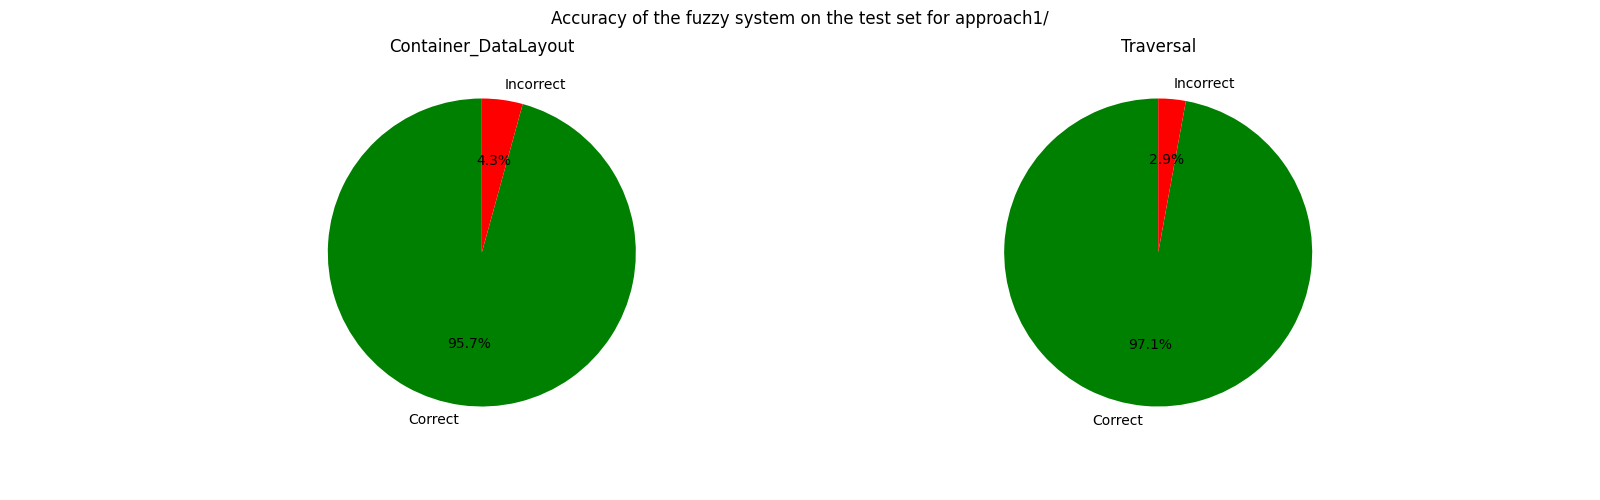

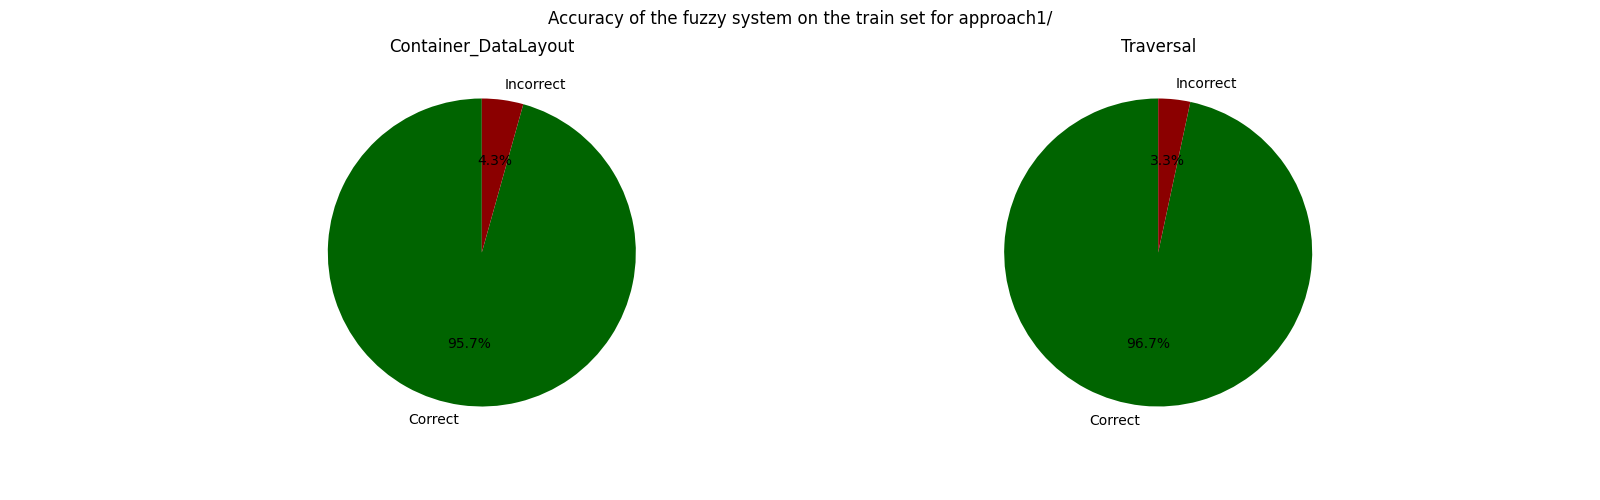

Number of rules:  43
Number of input variables:  4
Number of output variables:  3

approach2/:

Container_DataLayout:
Train: 0.9566377585056705
Test: 0.9572113611213574

Traversal:
Train: 0.9845264194706574
Test: 0.9856318454834531


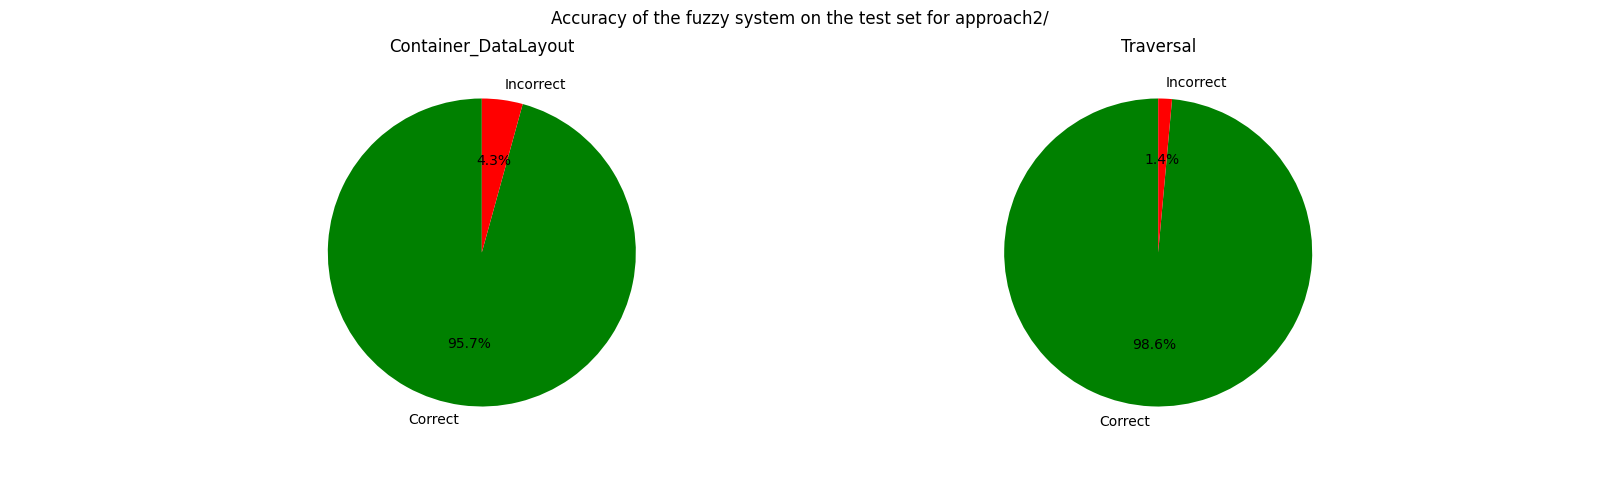

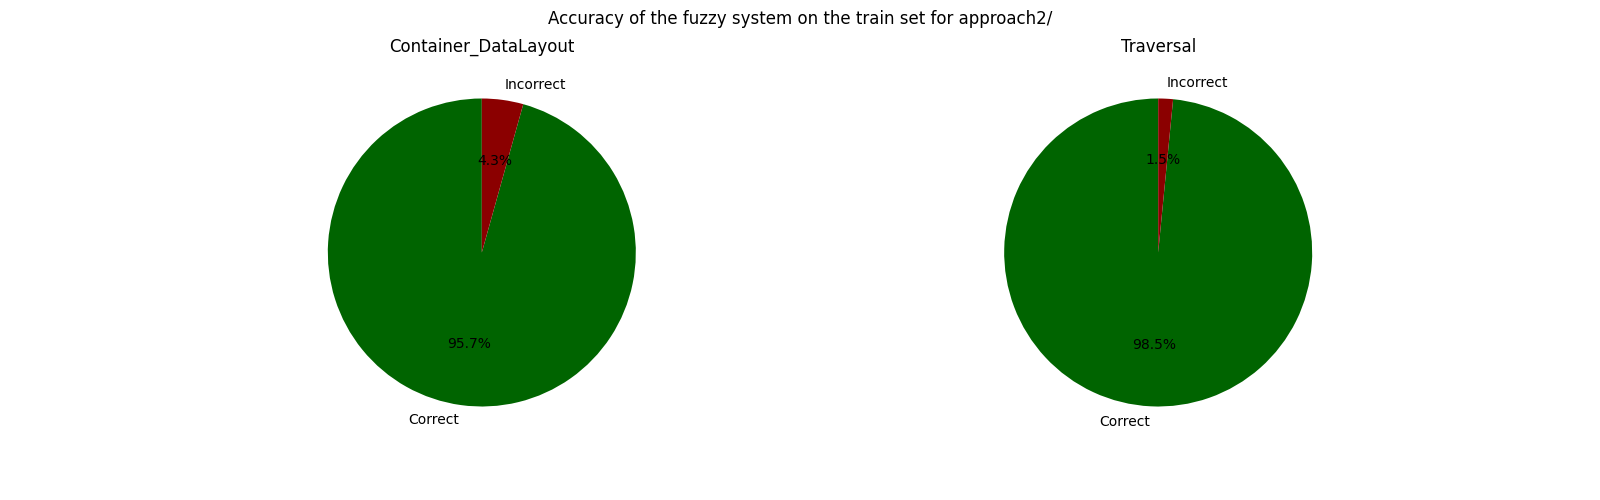

In [11]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

fiss, algo_ranking = benchmark_rules("approach1/", train, test, K=1, n=600)
fiss, algo_ranking = benchmark_rules("approach2/", train, test, K=1, n=600)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.

Union:  "("("("("("("("("("("("("("("("("("("("("("("("("("("("("("("(Traversal is "vcl_c06": Gaussian(8.333333333333334, 0.07575757575757576))↑0.00" or "(Traversal is "lc_c01, lc_sliced_balanced, vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(0.8333333333333334, 0.07575757575757576))↑0.59")" or "(Traversal is "lc_c18": Gaussian(2.5, 0.07575757575757576))↑0.00")" or "(Traversal is "vcl_c01_balanced": Gaussian(5.0, 0.07575757575757576))↑0.00")" or "(Traversal is "lc_c01, vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(1.6666666666666667, 0.07575757575757576))↑0.41")" or "(Traversal is "vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(6.666666666666667, 0.07575757575757576))↑0.00")" or "(Traversal is "vcl_cluster_iteration": Gaussian(9.166666666666668, 0.07575757575757576))↑0.00")" or "(Traversal is "lc_c01, vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(1.6666666666666667, 0.07575757575757576))↑0.20")" or "(Traversal is "vcl_c01_balanced,

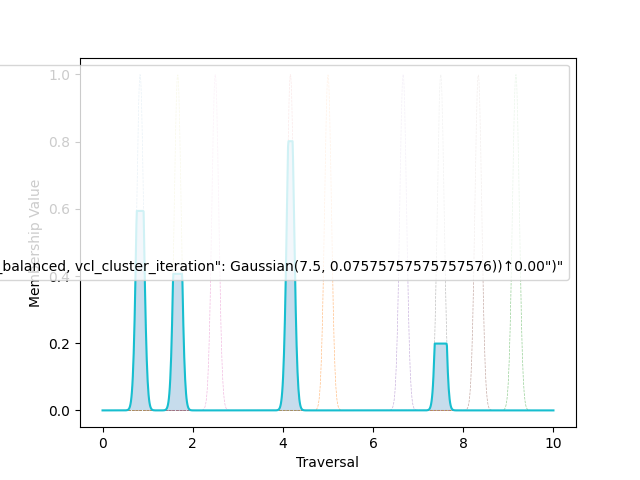

In [12]:
data = {"maxDensity": 0.2, "maxParticlesPerCell": 5,  "homogeneity": 0.5,
        "particlesPerCellStdDev": 1, "avgParticlesPerCell": 1.2, "threadCount": 10}


union = fiss["Traversal"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax, n=1000)

print("Union: ", union)

prediction = fiss["Traversal"].predictClosest(
    data, algo_ranking["Traversal"], n=600)[1]

print("Prediction: ", prediction)